# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge of Ridge and Lasso regression!

## Objectives

In this lab you will: 

- Use Lasso and Ridge regression with scikit-learn 
- Compare and contrast Lasso, Ridge and non-regularized regression 

## Housing Prices Data

Let's look at yet another house pricing dataset: 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Housing_Prices/train.csv')

Look at `.info()` of the data: 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
df.shape

(1460, 81)

- First, split the data into `X` (predictor) and `y` (target) variables 
- Split the data into 75-25 training-test sets. Set the `random_state` to 10 
- Remove all columns of `object` type from `X_train` and `X_test` and assign them to `X_train_cont` and `X_test_cont`, respectively 

In [4]:
# Create X and y
y = df['SalePrice']
X = df.iloc[:,:-1]

In [5]:
X.columns[6]

'Alley'

In [6]:



# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=10)

# Remove "object"-type features from X
l=X.dtypes
cont_features=X.copy()
for idx,elem in enumerate(l):
    if elem == object:
        col_name_to_drop=X.columns[idx]
        cont_features=cont_features.drop(col_name_to_drop,1)
    



# Remove "object"-type features from X_train and X_test

ll=X_train.dtypes
X_train_cont=X_train.copy()
for idx,elem in enumerate(ll):
    if elem == object:
        col_name_to_drop=X_train.columns[idx]
        X_train_cont=X_train_cont.drop(col_name_to_drop,1)

        
lll=X_test.dtypes
X_test_cont=X_test.copy()
for idx,elem in enumerate(lll):
    if elem == object:
        col_name_to_drop=X_test.columns[idx]
        X_test_cont=X_test_cont.drop(col_name_to_drop,1)

        
X_train.shape,X_train_cont.shape

((1095, 80), (1095, 37))

## Let's use this data to build a first naive linear regression model

- Fill the missing values in data using median of the columns (use [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)) 
- Fit a linear regression model to this data 
- Compute the R-squared and the MSE for both the training and test sets 


In [7]:
X_test_cont.LotFrontage[816]

nan

In [8]:
X_test_cont.GarageYrBlt[30:45]      




413     1927.0
603     2004.0
498     1967.0
565     1920.0
299     1950.0
1337       NaN
1012    1923.0
501     2005.0
981     1998.0
1424    1970.0
1015    2001.0
596     1930.0
431        NaN
1382    1989.0
704     2004.0
Name: GarageYrBlt, dtype: float64

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Impute missing values with median using SimpleImputer
impute = SimpleImputer(strategy='median')
X_train_imputed = impute.fit_transform(X_train_cont)
# NOTE: THE MODEL IS FITTED ON THE TRAIN TEST.
# SO, WE ARE USING ONLY VALUES FROM THE TRAINING SAMPLE TO CALCULATE THE MEDIAN.
# WE DON'T WANT LEAKAGE OF THE TEST SET  BECAUSE WE ARE NOT SUPPOSED TO KNOW THE TEST SET.
X_test_imputed = impute.transform(X_test_cont)

X_test_imputeddf=pd.DataFrame(X_test_imputed)
X_test_imputeddf.columns =X_test_cont.columns
print(X_test_cont.LotFrontage[816])
print(X_test_imputeddf.LotFrontage[2])
print(X_test_cont.GarageYrBlt[30:45])    
print(X_test_imputeddf.GarageYrBlt[30:45])     


# Fit the model and print R2 and MSE for training and test sets
linreg = LinearRegression()
model=linreg.fit(X_train_imputed,y_train)
print( model.coef_ )
print(model.intercept_)
y_train_hat=model.predict(X_train_imputed)
y_test_hat=model.predict(X_test_imputed)

# Print R2 and MSE for training and test sets
print('R2 train : ',r2_score(y_train,y_train_hat))
print('R2 test : ',r2_score(y_test,y_test_hat))
print('MSE train : ',mean_squared_error(y_train,y_train_hat))
print('MSE test : ',mean_squared_error(y_test,y_test_hat))

print('Training r^2:', model.score(X_train_imputed, y_train))
print('Test r^2:', model.score(X_test_imputed, y_test))

nan
70.0
413     1927.0
603     2004.0
498     1967.0
565     1920.0
299     1950.0
1337       NaN
1012    1923.0
501     2005.0
981     1998.0
1424    1970.0
1015    2001.0
596     1930.0
431        NaN
1382    1989.0
704     2004.0
Name: GarageYrBlt, dtype: float64
30    1927.0
31    2004.0
32    1967.0
33    1920.0
34    1950.0
35    1980.0
36    1923.0
37    2005.0
38    1998.0
39    1970.0
40    2001.0
41    1930.0
42    1980.0
43    1989.0
44    2004.0
Name: GarageYrBlt, dtype: float64
[ 2.60736661e-01 -1.67051460e+02 -9.49365740e+01  4.34614927e-01
  1.79972399e+04  4.70791462e+03  3.12145759e+02  1.19420406e+02
  2.96472742e+01  7.46392008e+00 -4.54314837e+00  4.49817991e-01
  3.37058969e+00  1.91279618e+01  2.16978544e+01 -8.37469386e+00
  3.24511224e+01  1.09400625e+04  5.10342852e+03  2.66566407e+03
 -6.15547667e+03 -8.16845443e+03 -1.53878807e+04  4.41650799e+03
  3.14455346e+03  9.54122165e+01  1.34602713e+04 -8.99882998e+00
  3.70388769e+01 -8.45648480e-01  1.14488176e+01

## Normalize your data

- Normalize your data using a `StandardScalar`  
- Fit a linear regression model to this data 
- Compute the R-squared and the MSE for both the training and test sets 


In [10]:
from sklearn.preprocessing import StandardScaler

# Scale the train and test data
scaler = StandardScaler()
X_train_imputed_scaled = scaler.fit_transform(X_train_imputed)
X_test_imputed_scaled = scaler.transform(X_test_imputed)

# Fit the model
linreg_norm = LinearRegression()
model2=linreg_norm.fit(X_train_imputed_scaled,y_train)
# print( model2.coef_ )
# print(model2.intercept_)
y2_train_hat=model2.predict(X_train_imputed_scaled)
y2_test_hat=model2.predict(X_test_imputed_scaled)

# Print R2 and MSE for training and test sets
print('R2 train : ',r2_score(y_train,y2_train_hat))
print('R2 test : ',r2_score(y_test,y2_test_hat))
print('MSE train : ',mean_squared_error(y_train,y2_train_hat))
print('MSE test : ',mean_squared_error(y_test,y2_test_hat))



R2 train :  0.8069838175643864
R2 test :  0.8202958400345651
MSE train :  1212338416.848168
MSE test :  1146545805.502335


## Include categorical variables

The above models didn't include categorical variables so far, let's include them! 


- Include all columns of `object` type from `X_train` and `X_test` and assign them to `X_train_cat` and `X_test_cat`, respectively 
- Fill missing values in all these columns with the string `'missing'` 

In [11]:
X.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
X.columns[10]

'LotConfig'

In [13]:
X['LotConfig'].dtypes != object

False

In [14]:
X.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [15]:
# Create X_cat which contains only the categorical variables
features_cat = X.copy()
features_cat=[col for col in X.columns  if X[col].dtypes == object ]

X_train_cat = X_train[features_cat]
X_test_cat = X_test[features_cat]

X_test.shape,X_test_cont.shape,X_test_cat.shape

# Fill missing values with the string 'missing'
X_train_cat.fillna(value='missing',inplace = True)
X_test_cat.fillna(value='missing',inplace = True)


- One-hot encode all these categorical columns using `OneHotEncoder` 
- Transform the training and test DataFrames (`X_train_cat`) and (`X_test_cat`) 
- Run the given code to convert these transformed features into DataFrames 

In [16]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncode categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')

# Transform training and test sets
X_train_ohe = ohe.fit_transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)

# Convert these columns into a DataFrame
columns = ohe.get_feature_names(input_features=X_train_cat.columns)
cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)


- Combine `X_train_imputed_scaled` and `cat_train_df` into a single DataFrame  
- Similarly, combine `X_test_imputed_scaled` and `cat_test_df` into a single DataFrame 

In [17]:
type(X_train_imputed_scaled),type(cat_train_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [18]:
# Your code here
X_train_all = pd.concat([ pd.DataFrame(X_train_imputed_scaled), cat_train_df],axis = 1)
X_test_all = pd.concat([ pd.DataFrame(X_test_imputed_scaled), cat_test_df],axis = 1)

In [19]:
X_train_all.shape,X_test_all.shape,X_train_all.columns


((1095, 296),
 (365, 296),
 Index([                      0,                       1,
                              2,                       3,
                              4,                       5,
                              6,                       7,
                              8,                       9,
        ...
               'SaleType_ConLw',          'SaleType_New',
                 'SaleType_Oth',           'SaleType_WD',
        'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
         'SaleCondition_Alloca',  'SaleCondition_Family',
         'SaleCondition_Normal', 'SaleCondition_Partial'],
       dtype='object', length=296))

Now build a linear regression model using all the features (`X_train_all`). Also, print the R-squared and the MSE for both the training and test sets. 

In [20]:
linregcat = LinearRegression()
linregcat.fit(X_train_all,y_train)        
y_train_cat_hat = linregcat.predict(X_train_all)
y_test_cat_hat = linregcat.predict(X_test_all)
print(mean_squared_error(y_train,y_train_cat_hat))
print(mean_squared_error(y_test,y_test_cat_hat))
print(r2_score(y_train,y_train_cat_hat))
print(r2_score(y_test,y_test_cat_hat))

401981271.7616438
1.0974611036866281e+30
0.9360006336450505
-1.7201085624864106e+20


Notice the severe overfitting above; our training R-squared is very high, but the test R-squared is negative! Similarly, the scale of the test MSE is orders of magnitude higher than that of the training MSE.

## Ridge and Lasso regression

Use all the data (normalized features and dummy categorical variables, `X_train_all`) to build two models - one each for Lasso and Ridge regression. Each time, look at R-squared and MSE. 

## Lasso

#### With default parameter (alpha = 1)

In [21]:
from sklearn.linear_model import Lasso, Ridge
# Note that in scikit-learn, the regularization parameter is denoted by alpha (and not lambda)


lasso = Lasso(alpha=1)
lasso.fit(X_train_all,y_train)

y_train_lasso_hat = lasso.predict(X_train_all)
y_test_lasso_hat = lasso.predict(X_test_all)

print(mean_squared_error(y_train,y_train_lasso_hat))
print(mean_squared_error(y_test,y_test_lasso_hat))
print(r2_score(y_train,y_train_lasso_hat))
print(r2_score(y_test,y_test_lasso_hat))

402185562.0947689
710215967.2621557
0.9359681086176651
0.888684112594205


In [22]:
np.sum(lasso.coef_ == 0)

34

#### With a higher regularization parameter (alpha = 10)

In [23]:

lasso = Lasso(alpha=10)
lasso.fit(X_train_all,y_train)

y_train_lasso_hat = lasso.predict(X_train_all)
y_test_lasso_hat = lasso.predict(X_test_all)

print(mean_squared_error(y_train,y_train_lasso_hat))
print(mean_squared_error(y_test,y_test_lasso_hat))
print(r2_score(y_train,y_train_lasso_hat))
print(r2_score(y_test,y_test_lasso_hat))

412143851.3235962
659215063.9643533
0.9343826511712741
0.8966777526569275


In [24]:
np.sum(lasso.coef_ == 0)

76

## Ridge

#### With default parameter (alpha = 1)

In [25]:
ridge = Ridge(alpha=1)
ridge.fit(X_train_all,y_train)

y_train_ridge_hat = ridge.predict(X_train_all)
y_test_ridge_hat = ridge.predict(X_test_all)

print(mean_squared_error(y_train,y_train_ridge_hat))
print(mean_squared_error(y_test,y_test_ridge_hat))
print(r2_score(y_train,y_train_ridge_hat))
print(r2_score(y_test,y_test_ridge_hat))

482419834.3987995
738614579.8334147
0.9231940244796031
0.8842330485444211


In [26]:
np.sum(ridge.coef_ == 0)

0

#### With default parameter (alpha = 10)

In [27]:
ridge = Ridge(alpha=10)
ridge.fit(X_train_all,y_train)

y_train_ridge_hat = ridge.predict(X_train_all)
y_test_ridge_hat = ridge.predict(X_test_all)

print(mean_squared_error(y_train,y_train_ridge_hat))
print(mean_squared_error(y_test,y_test_ridge_hat))
print(r2_score(y_train,y_train_ridge_hat))
print(r2_score(y_test,y_test_ridge_hat))

634381310.5991354
743583635.452231
0.8990002650425939
0.8834542222982166


In [28]:
np.sum(ridge.coef_ == 0)

0

## Compare the metrics    

Write your conclusions here: 
_________________________________
When alpha (= lambda) increases, the model fits less the training set but genralizes better.

lasso zeroes some coefficiients. When alpha (=lambda) increases, more coefficients are zeroed resulting in a simpler model.

## Compare number of parameter estimates that are (very close to) 0 for Ridge and Lasso

Use 10**(-10) as an estimate that is very close to 0. 

In [29]:
# Number of Ridge params almost zero
np.sum(abs(ridge.coef_) <10**(-10))

0

In [30]:
# Number of Lasso params almost zero
np.sum(abs(lasso.coef_) <10**(-10))

77

In [31]:
print(len(lasso.coef_))
print(sum(abs(lasso.coef_) < 10**(-10))/ len(lasso.coef_))

296
0.26013513513513514


Lasso was very effective to essentially perform variable selection and remove about 25% of the variables from your model!

## Put it all together

To bring all of our work together lets take a moment to put all of our preprocessing steps for categorical and continuous variables into one function. This function should take in our features as a dataframe `X` and target as a Series `y` and return a training and test DataFrames with all of our preprocessed features along with training and test targets. 

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


def preprocess(X, y):
    '''Takes in features and target and implements all preprocessing steps for categorical and continuous features 
    returning  train and test DataFrames with targets
    
    X has all the features but not the target.
    y has the target only
    '''
    
    # Train-test split (75-25), set seed to 10
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=10)
    
    
    # Remove "object"-type features from X_train and X_test

    ll=X.dtypes
    X_train_cont=X_train.copy()
    for idx,elem in enumerate(ll):
        if elem == object:
            col_name_to_drop=X_train.columns[idx]
            X_train_cont=X_train_cont.drop(col_name_to_drop,1)

    X_test_cont=X_test.copy()
    for idx,elem in enumerate(ll):
        if elem == object:
            col_name_to_drop=X_test.columns[idx]
            X_test_cont=X_test_cont.drop(col_name_to_drop,1)

    # Impute missing values with median using SimpleImputer
    impute = SimpleImputer(strategy='median')
    X_train_imputed = impute.fit_transform(X_train_cont)
    # NOTE: THE MODEL IS FITTED ON THE TRAIN TEST.
    # SO, WE ARE USING ONLY VALUES FROM THE TRAINING SAMPLE TO CALCULATE THE MEDIAN.
    # WE DON'T WANT LEAKAGE OF THE TEST SET  BECAUSE WE ARE NOT SUPPOSED TO KNOW THE TEST SET.
    X_test_imputed = impute.transform(X_test_cont)    


    # Scale the train and test data
    scaler = StandardScaler()
    X_train_imputed_scaled = scaler.fit_transform(X_train_imputed)
    # NOTE: THE MODEL IS FITTED ON THE TRAIN TEST.
    X_test_imputed_scaled = scaler.transform(X_test_imputed)


    # Create X_cat which contains only the categorical variables
    features_cat = X.copy()
    features_cat=[col for col in X.columns  if X[col].dtypes == object ]
    X_train_cat = X_train[features_cat]
    X_test_cat = X_test[features_cat]

    # Fill nans with a value indicating that that it is missing
    # Fill missing values with the string 'missing'
    X_train_cat.fillna(value='missing',inplace = True)
    X_test_cat.fillna(value='missing',inplace = True)

    # OneHotEncode Categorical variables
    ohe = OneHotEncoder(handle_unknown='ignore')
    # Transform training and test sets
    X_train_ohe = ohe.fit_transform(X_train_cat)
    # NOTE: THE MODEL IS FITTED ON THE TRAIN TEST.
    X_test_ohe = ohe.transform(X_test_cat)
    # Convert these columns into a DataFrame
    columns = ohe.get_feature_names(input_features=X_train_cat.columns)
    cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
    cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)
    
    # Combine categorical and continuous features into the final dataframe
    X_train_all = pd.concat([ pd.DataFrame(X_train_imputed_scaled), cat_train_df],axis = 1)
    X_test_all = pd.concat([ pd.DataFrame(X_test_imputed_scaled), cat_test_df],axis = 1) 
    
    return X_train_all, X_test_all, y_train, y_test

In [33]:
X_train_all, X_test_all, y_train, y_test = preprocess(X, y)
X_train_all.shape, X_test_all.shape, y_train.shape, y_test.shape

((1095, 296), (365, 296), (1095,), (365,))

### Graph the training and test error to find optimal alpha values

Earlier we tested two values of alpha to see how it effected our MSE and the value of our coefficients. We could continue to guess values of alpha for our Ridge or Lasso regression one at a time to see which values minimize our loss, or we can test a range of values and pick the alpha which minimizes our MSE. Here is an example of how we would do this:  

In [38]:
X_train_all, X_test_all, y_train, y_test = preprocess(X, y)

train_mse = []
train_r2 = []
test_mse = []
test_r2 = []
alphas = []

for alpha in np.linspace(0, 200, num=50):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_all, y_train)
    
    train_preds = lasso.predict(X_train_all)
    train_mse.append(mean_squared_error(y_train, train_preds))
    train_r2.append(r2_score(y_train, train_preds))

    test_preds = lasso.predict(X_test_all)
    test_mse.append(mean_squared_error(y_test, test_preds))
    test_r2.append(r2_score(y_test, test_preds))
    
    alphas.append(alpha)

Optimal Alpha Value: 40


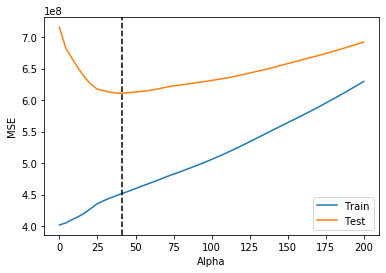

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

Optimal Alpha Value: 40


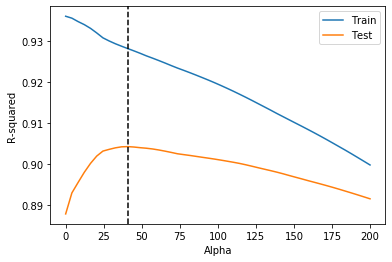

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(alphas, train_r2, label='Train')
ax.plot(alphas, test_r2, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('R-squared')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmax(test_r2)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

Take a look at this graph of our training and test MSE against alpha. Try to explain to yourself why the shapes of the training and test curves are this way. Make sure to think about what alpha represents and how it relates to overfitting vs underfitting.

## Summary

Well done! You now know how to build Lasso and Ridge regression models, use them for feature selection and find an optimal value for $\text{alpha}$. 